In [79]:
from common import SparseGraph

In [80]:
class UF:
    # union find
    
    def __init__(self, N):
        self.N = N
        
        self.ID = [x for x in range(N)]
    
    def union(self, p, q):
        pid = self.find(p)
        qid = self.find(q)
        
        if pid == qid:
            return
        
        for x in range(len(self.ID)):
            if self.ID[x] == pid:
                self.ID[x] = qid
        
        self.N -= 1

    def find(self, p):
        if p < 0 or p >= len(self.ID):
            raise Exception("out of range")
            
        return self.ID[p]

    def connected(self, p, q):
        return self.find(p) == self.find(q)
    
    def count(self):
        return self.N
    
    def __str__(self):
        return str(self.ID)



In [81]:
uf = UF(10)
uf.union(7,8)
uf.union(8,9)
print (uf)

[0, 1, 2, 3, 4, 5, 6, 9, 9, 9]


In [82]:
class PQ:
    # priority queue
    
    def __init__(self):
        self.A = []
        self.N = 0
    
    def isEmpty(self):
        return self.N == 0
    
    def key(self, k):
        return self.A[k][2]
    
    def swim(self, k):
        A = self.A

        while k > 0:
            p = (k - 1) // 2
            if self.key(p) <= self.key(k):
                break
            
            A[p], A[k] = A[k], A[p]
            k = p        
        
    def sink(self, k):
        A = self.A
        N = self.N
        
        while k * 2 + 1 < N:
            p = k
            
            if self.key(k) > self.key(k * 2 + 1):
                p = k * 2 + 1
                
            if k * 2 + 2 < N and self.key(p) > self.key(k * 2 + 2):
                p = k * 2 + 2
            
            if p == k:
                break
            
            A[k], A[p] = A[p], A[k]
            k = p            
        
    def getMin(self):
        if self.N == 0:
            raise Exception('PQ is empty')
        
        x = self.A[0]
        
        self.A[0] = self.A[self.N - 1]
        self.N -= 1

        self.sink(0)
        
        return x
    
    def insert(self, u, v, weight):
        self.A.append([u, v, weight])
        self.N += 1
        
        self.swim(self.N - 1)
    
    def decreaseKey(self, u, v, weight):
        index = -1
        for k in range(self.N):
            if u == self.A[k][0] and v == self.A[k][1]:
                index = k
                break
            
        if index < 0:
            return
        
        original_weight = self.A[k][2]
        self.A[k][2] = weight
        
        if original_weight > weight:
            self.swim(k)
        elif original_weight < weight:
            self.sink(k)
    
#     def contains(self, v):
#         for k in range(self.N):
#             if self.A[k][0] == v:
#                 return True
        
#         return False
    

In [83]:
class MstContext:
    
    MAX_DISTANCE = 99999999999999999
    
    def __init__(self, g):
        self.pred = {} # 前驱结点
        self.key ={} # 距离
        self.pq = PQ()
        
        for k in g.V:
            v = g.V[k]            
            self.pred[v.v] = -1
            self.key[v.v] = self.MAX_DISTANCE
        
    def __str__(self):
        s = '{\n'
        s += '    pred = %s\n' % str(self.pred)
        s += '    key = %s\n' % str(self.key)
        s += '}\n'
        
        return s

    
class MstGraph(SparseGraph):
    
    def __init__(self):
        super(MstGraph, self).__init__()
        
    def computeMST(self):
        pq = PQ()
        uf = UF(max(list(self.V)) + 1)
        mst = []
        
        for x in self.V:
            u = self.V[x]
            
            v = u.next
            while v is not None:
                pq.insert(u.v, v.v, v.weight)
                v = v.next
                    
        while not pq.isEmpty() and len(mst) < len(self.V) - 1:            
            e = pq.getMin()
            
            v = e[0]
            w = e[1]
            
            if uf.connected(v, w):
                continue
            
            uf.union(v, w)
            mst.append(e)
            
        return mst

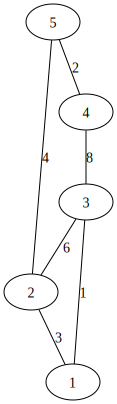

In [84]:
g = MstGraph()
g.addV(1)
g.addV(2)
g.addV(3)
g.addV(4)
g.addV(5)

g.addE(1, 2, 3)
g.addE(2, 1, 3)

g.addE(1, 3, 1)
g.addE(3, 1, 1)

g.addE(3, 4, 8)
g.addE(4, 3, 8)

g.addE(4, 5, 2)
g.addE(5, 4, 2)

g.addE(2, 5, 4)
g.addE(5, 2, 4)

g.addE(2, 3, 6)
g.addE(3, 2, 6)

g.draw(False, True)

In [85]:
mst = g.computeMST()
print (mst)

[[1, 3, 1], [4, 5, 2], [1, 2, 3], [5, 2, 4]]
